In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return true;
}

<IPython.core.display.Javascript object>

In [3]:
%matplotlib inline
import os
import random
import sys
from pathlib import Path

import cv2
from matplotlib import pyplot as plt

os.environ["CUDA_VISIBLE_DEVICES"] = "2"

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100  # 200 e.g. is really fine, but slower

In [4]:
base_path = Path(os.getcwd()).parent.parent
sys.path.append(base_path.as_posix())

In [ ]:
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.engine import DefaultPredictor
from src.tools.train_maskrcnn import load_config_from_file
from src.maskrcnn.data import register_datasets # noqa

dataset_name = "parcel2d_demo_train"
data = DatasetCatalog.get(dataset_name)
checkpoint = base_path / "data" / "pretrained" / "openimages_10k.pth"
config_file = base_path / "src"/ "maskrcnn" / "configs" / "maskrcnn.yaml"
cfg = load_config_from_file(config_file, freeze=False)
cfg.MODEL.WEIGHTS = checkpoint.as_posix()
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.95
predictor = DefaultPredictor(cfg)


/home/naumann/anaconda3/envs/cuboid_reconstruction/lib/python3.8/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
/home/naumann/anaconda3/envs/cuboid_reconstruction/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, p

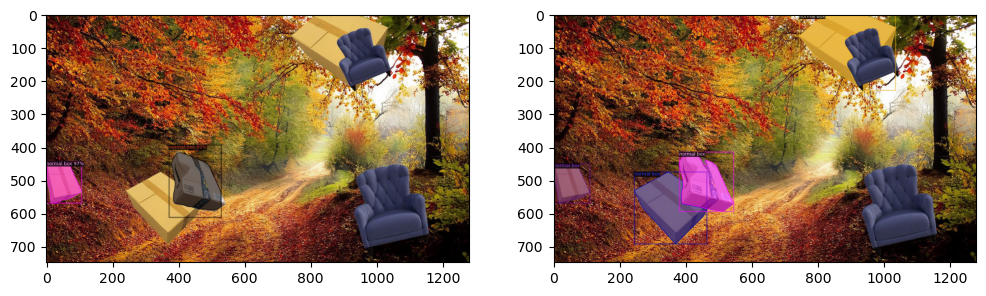

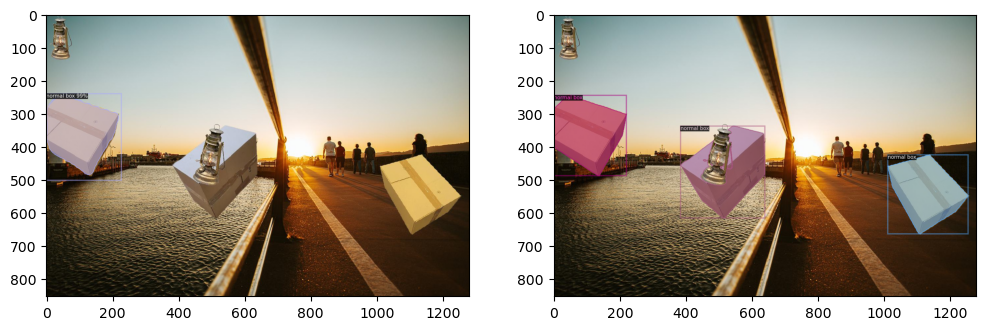

In [6]:
from detectron2.utils.visualizer import Visualizer

for d in random.sample(data, 2):
    img = cv2.imread(d["file_name"], cv2.IMREAD_UNCHANGED)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    outputs = predictor(img)
    v_pred = Visualizer(img, metadata=MetadataCatalog.get(dataset_name))
    v_gt = Visualizer(img, metadata=MetadataCatalog.get(dataset_name))
    out_pred = v_pred.draw_instance_predictions(outputs["instances"].to("cpu"))
    out_gt = v_gt.draw_dataset_dict(d)
    # Plot
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(out_pred.get_image())
    axs[1].imshow(out_gt.get_image())
